In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Baseline Classification Pipeline

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("./data/ECG/ECG200_TRAIN.txt", sep='\s+', header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1.0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1.0,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1.0,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1.0,1.168874,2.075901,1.760140,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1.0,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190


In [8]:
set(df[0])

{-1.0, 1.0}

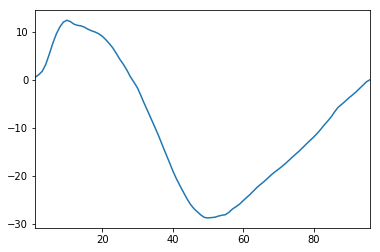

In [13]:
df.iloc[0,1:].cumsum().plot()

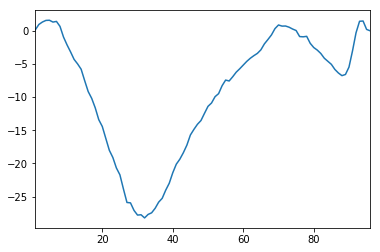

In [12]:
df.iloc[1,1:].cumsum().plot()

#### Goal: Build a classification model (labels are in column 0) against all features.


## Steps

1. Smoothen / filter / denoising ==> Get rid of randomly looking peaks.
    - Moving average. 
    - Percent change. 
    - Exponential smoothing.
    - Cumsum (basically the integral).
    - **Savitzky-Golay filter** ==> Approximating by polynomials in a small window.
    - **Fourier transform**.
    
2. Feature selection: Choose some features, either manually or algorithmically.
    - peakfinder functions: find local (within a given window) maxima/minima.
    - select features using a black-box optimization algorithm.
    - Backward/forward feature selection.
3. Create model by "normal" machine learning methods.


In [14]:
df.shape

(100, 97)

# Baseline exampe

In [20]:
X = np.array([df.iloc[col,1:].cumsum().values for col in range(df.shape[0])])

In [21]:
y = df.iloc[:,0].values

In [22]:
from sklearn.feature_selection import SelectKBest # Replace by some peakfinder/blackbox method
# Other estimators can work well => decision trees / RF usually bad choices in this case
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline

In [23]:
sel = SelectKBest(k=10)
clf = LogisticRegression()
pipe = make_pipeline(sel, clf)

In [24]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x000001BF88066C80>)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

## TO DO:
- Look at dependence of number of features vs accuracy.
- Look at feature importance against two representatives of each class.